##  Python繪製K線圖_mplfinance

### 製作者：許哲瑜 XU ZHE-YU

    Created: 2021/10/17  Last modified:2021.11.21 

### 繪製股票K線圖:
  1. 使用pandas讀取股價csv檔，包含開盤價,最高價,最低價,收盤價
  2. 使用mplfinance繪製K線圖

In [40]:
import pandas as pd
SData = pd.read_csv('0050.csv')
print(SData.head())

         Date   Open   High    Low  Close  Volume
0  2019/01/02  75.85  75.90  73.95  74.05    8532
1  2019/01/03  73.80  74.00  73.25  73.35   13347
2  2019/01/04  72.80  72.80  72.00  72.20   21292
3  2019/01/07  73.55  74.05  73.25  73.95   14606
4  2019/01/08  74.15  74.15  73.55  73.65   11007


In [41]:
SData.index = SData['Date']
SData.index = pd.DatetimeIndex(SData.index)
print(SData.head())

                  Date   Open   High    Low  Close  Volume
Date                                                      
2019-01-02  2019/01/02  75.85  75.90  73.95  74.05    8532
2019-01-03  2019/01/03  73.80  74.00  73.25  73.35   13347
2019-01-04  2019/01/04  72.80  72.80  72.00  72.20   21292
2019-01-07  2019/01/07  73.55  74.05  73.25  73.95   14606
2019-01-08  2019/01/08  74.15  74.15  73.55  73.65   11007


In [43]:
#stock = SData.iloc[:,1:5]
print(stock.head())

# 抓取近20日的資料
stock_20d = SData.iloc[-20:,:]
print(stock_20d)

             Open   High    Low  Close
Date                                  
2019-01-02  75.85  75.90  73.95  74.05
2019-01-03  73.80  74.00  73.25  73.35
2019-01-04  72.80  72.80  72.00  72.20
2019-01-07  73.55  74.05  73.25  73.95
2019-01-08  74.15  74.15  73.55  73.65
                  Date    Open    High     Low   Close  Volume
Date                                                          
2021-08-26  2021/08/26  137.45  138.00  136.35  137.00    7276
2021-08-27  2021/08/27  136.70  138.50  136.45  138.15   16875
2021-08-30  2021/08/30  138.65  139.50  138.45  139.50   21974
2021-08-31  2021/08/31  139.40  140.35  138.10  140.35   16604
2021-09-01  2021/09/01  140.15  141.30  140.05  141.00   18844
2021-09-02  2021/09/02  140.90  141.40  139.90  139.90    7218
2021-09-03  2021/09/03  140.65  142.10  140.45  141.90   11544
2021-09-06  2021/09/06  141.90  143.50  141.60  142.55   14283
2021-09-07  2021/09/07  142.80  142.80  141.45  141.90    8414
2021-09-08  2021/09/08  141.75  14

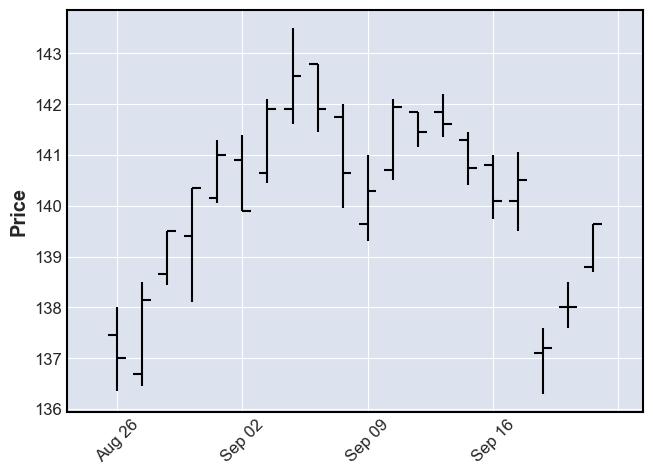

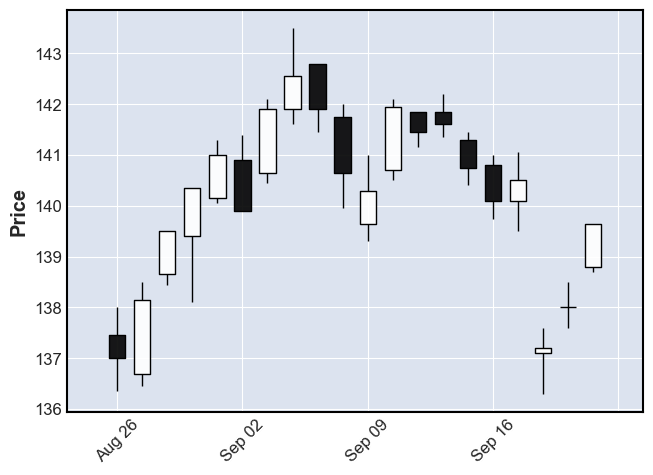

In [44]:
import mplfinance as mpf
mpf.plot(stock_20d)
mpf.plot(stock_20d, type='candle')

### Morning star 條件：
* 第1根是陰線，第2根可以是陽線或陰線，第3根是陽線。
* 第2根的開盤價與收盤價(也就是灰色方塊的部分)都要小於第1根的收盤價與第3根的開盤價。
* 第3根的方塊長度要大於第1根的綠色方塊長度的一半。

>Morning star的意義，在第1根大黑K之後，接第2根漲跌幅度較小的K棒，代表跌幅收斂，緊接著第3根大紅K，表示趨勢<font color = 'red'> 由下跌反轉為上漲行情 </font>


### Evening star 條件：
* 第1根是陽線，第2根可以是陽線或陰線，第3根是陰線。
* 第2根的開盤價與收盤價(也就是灰色方塊的部分)都要大於第1根的收盤價與第3根的開盤價。
* 第3根的方塊長度要大於第1根的方塊長度的一半。

> Evening star的意義，在第1根大紅K之後，接第2根漲跌幅度較小的K棒，代表漲幅收斂，緊接著第3根大黑K，表示趨勢<font color = 'red'> 由上漲反轉為下跌行情 </font>

### 抓取Evening star
1. 抓取股票價格 and 整理資料
2. 瞭解數據概況
3. 利用K線特徵抓取Evening star出現的日期
4. 回頭檢視K線圖中，python抓到日期的K線圖是否與Evening star相符

In [91]:
import pandas as pd
stock = pd.read_csv("2330.csv")
stock.index = pd.DatetimeIndex(stock['Date'])
print(stock.head())
stock = stock.iloc[:,1:]


                  Date   Open   High    Low  Close  Volume
Date                                                      
2019-01-02  2019/01/02  226.5  226.5  219.0  219.5   32900
2019-01-03  2019/01/03  214.0  218.0  214.0  215.5   34616
2019-01-04  2019/01/04  211.5  211.5  206.5  208.0   67044
2019-01-07  2019/01/07  212.0  214.0  211.0  213.0   35695
2019-01-08  2019/01/08  212.0  212.5  210.0  211.0   23794


In [105]:
stock_2021 = stock['2021']
#print(type(stock_2021))
stock_2021_Open = stock_2021.Open
stock_2021_Close = stock_2021.Close
#print(type(stock_2021_Close))
# 當日漲跌點數
stock_dailychg = stock_2021_Close - stock_2021_Open
stock_abs_dailychg = abs(stock_dailychg)
stock_abs_dailychg.describe()

<ipython-input-105-2be189d793d0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_2021 = stock['2021']


count    176.000000
mean       5.119318
std        4.658936
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       33.000000
dtype: float64

從上面的資料可以看到，0050在2020年245個交易日內：

* 平均漲跌點數為0.649184，因此在篩選第一根K棒的時候，可以取振幅大於這個數字的，會是相對比較大根的K棒
* 第2根K棒要取相對比較小根的，所以可以取25百分點的這個數字為標準
* 第3根K棒的振幅要超過第1根的一半，因此我們可以用-0.58為標準來篩選

### 利用K線特徵抓取Evening star出現的日期
根據上面的數字，就可以篩選符合條件的K棒

In [104]:
# 抓取 第1根大振幅陽線、第2根小振幅陽線或陰線、第3根陰線且振幅大於第1根的1/2
evening_condition_1 = [0,0]
for i in range(2, len(stock_dailychg)):
    if ( stock_dailychg[i-2] > 5.11 ) & ( abs(stock_dailychg[i-1]) < 0.388 ) & ( stock_dailychg[i] < -2.505 ):
        evening_condition_1.append(1)
    else:
        evening_condition_1.append(0)

# condition 1 符合的次數
print(evening_condition_1.count(1))

# 第2根的開盤與收盤價 均大於 第1根的收盤與第3根的開盤
evening_condition_2 = [0,0]
for i in range(2, len(stock_dailychg)):
    if ( stock_2021_Open[i-1] > stock_2021_Close[i-2] ) & ( stock_2021_Open[i-1] > stock_2021_Open[i] ) & ( stock_2021_Close[i-1] > stock_2021_Close[i-2] ) & ( stock_2021_Close[i-1] > stock_2021_Open[i] ):
        evening_condition_2.append(1)
    else:
        evening_condition_2.append(0)
print(evening_condition_2.count(1))

# Evening Star Signal
evening_star_signal = []
for i in range(len(evening_condition_1)):
    if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
        evening_star_signal.append(1)
    else:
        evening_star_signal.append(0)
print(evening_star_signal.count(1))

# Find Evening Star date
for i in range(len(evening_star_signal)):
    if evening_star_signal[i] == 1:
        print(stock_2021.index[i])

2
13
0


###  回頭檢視K線圖中，python抓到日期的K線圖是否與Evening star相符
把2020年7月的K線圖繪製出來

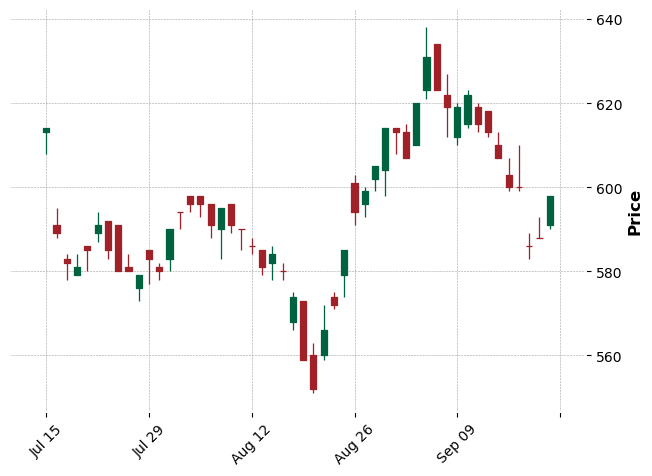

In [110]:
import mplfinance as mpf

data = stock_2021.iloc[-50:,:]
mpf.plot(data,type='candle', style ='charles')

In [79]:
# test
evening_condition_1 = [0,0]
evening_condition_1.append(1)
evening_condition_1.append(0)
evening_condition_1.append(1)
print(evening_condition_1)
evening_condition_1.count(1)

[0, 0, 1, 0, 1]


2

### RSI相對強弱指標
* Relative Strength Index
* 是用來衡量過去一段時間內，投資標的漲跌趨勢的相對指標
* 是一個相對的概念
---
它是以過去這段時間內的上漲量對比下跌量，或者我們也可以說是買盤與賣盤的相對強弱。

###  RSI的計算公式
>RSI = 100 × 前N日漲幅的平均值 ÷ ( 前N日漲幅的平均值 + 前N日跌幅的平均值 )

是計算漲或是跌的"幅度"
因此都是取絕對值，數字都是大於0的，所以RSI這個數字一定會介在0~100中間。
* 前N日漲幅的平均值 = 前N日跌幅的平均值：把這個條件帶入公式，RSI會等於50，代表這段時間內買盤跟賣盤是差不多的。
* 前N日漲幅的平均值 < 前N日跌幅的平均值：RSI小於50，代表買盤較賣盤弱。
* 前N日漲幅的平均值 > 前N日跌幅的平均值：RSI大於50，代表買盤較賣盤強。

In [121]:
import pandas as pd
stock = pd.read_csv('2330.csv')
stock.index = pd.DatetimeIndex(stock['Date'])
# 取得收盤價並計算每日漲跌(當天收盤價減去前日收盤價.shift(1))
Close = stock.Close
#print(Close.head())
#print(Close.shift(1).head())
chg = Close - Close.shift(1) 
print(chg.head())

# 計算上漲幅度與下跌幅度(正值)
up = pd.Series(index = chg.index, data = chg[chg>0])
up = up.fillna(0)
print(up.head())
down = pd.Series(index = chg.index, data = -chg[chg<0])
down = down.fillna(0)
print(down.head())

Date
2019-01-02    NaN
2019-01-03   -4.0
2019-01-04   -7.5
2019-01-07    5.0
2019-01-08   -2.0
Name: Close, dtype: float64
Date
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-07    5.0
2019-01-08    0.0
Name: Close, dtype: float64
Date
2019-01-02    0.0
2019-01-03    4.0
2019-01-04    7.5
2019-01-07    0.0
2019-01-08    2.0
Name: Close, dtype: float64


###  計算RSI值
由於RSI是計算過去一段時間的相對強弱，一般比較常見的是6日、12日、14日、24日

In [124]:
# 計算12日平均漲跌幅度
import numpy as np
up_mean_12 = []
down_mean_12 = []
for i in range(13,len(up)+1):
    up_mean_12.append(np.mean(up.values[i-12:i]))
    down_mean_12.append(np.mean(down.values[i-12:i]))

# 計算 RSI12
rsi_12 = []
for i in range(len(up_mean_12)):
    rsi_12.append( 100 * up_mean_12[i] / ( up_mean_12[i] + down_mean_12[i] ) )
rsi_12_series = pd.Series(index = Close.index[12:], data = rsi_12)

rsi_12_series

Date
2019-01-18    48.780488
2019-01-21    56.962025
2019-01-22    72.058824
2019-01-23    61.904762
2019-01-24    68.253968
                ...    
2021-09-16    39.705882
2021-09-17    40.298507
2021-09-22    36.000000
2021-09-23    25.000000
2021-09-24    23.809524
Length: 651, dtype: float64

In [123]:
up.values[1:12]

array([0. , 0. , 5. , 0. , 4.5, 0.5, 4.5, 0. , 2.5, 0. , 3. ])

### 建立計算RSI值的函式

In [66]:
def RSI(Close, period=12):
    # 整理資料
    import pandas as pd
    Chg = Close - Close.shift(1)
    Chg_pos = pd.Series(index=Chg.index, data=Chg[Chg>0])
    Chg_pos = Chg_pos.fillna(0)
    Chg_neg = pd.Series(index=Chg.index, data=-Chg[Chg<0])
    Chg_neg = Chg_neg.fillna(0)
    
    # 計算12日平均漲跌幅度
    import numpy as np
    up_mean = []
    down_mean = []
    for i in range(period+1, len(Chg_pos)+1):
        up_mean.append(np.mean(Chg_pos.values[i-period:i]))
        down_mean.append(np.mean(Chg_neg.values[i-period:i]))
    
    # 計算 RSI
    rsi = []
    for i in range(len(up_mean)):
        rsi.append( 100 * up_mean[i] / ( up_mean[i] + down_mean[i] ) )
    rsi_series = pd.Series(index = Close.index[period:], data = rsi)
    return rsi_series

In [67]:
# 應用上方函式
import pandas as pd
stock = pd.read_csv('2330.csv')
stock.index = pd.DatetimeIndex(stock['Date'])
Close = stock.Close
RSI(Close)

Date
2019-01-18    48.780488
2019-01-21    56.962025
2019-01-22    72.058824
2019-01-23    61.904762
2019-01-24    68.253968
                ...    
2021-09-16    39.705882
2021-09-17    40.298507
2021-09-22    36.000000
2021-09-23    25.000000
2021-09-24    23.809524
Length: 651, dtype: float64

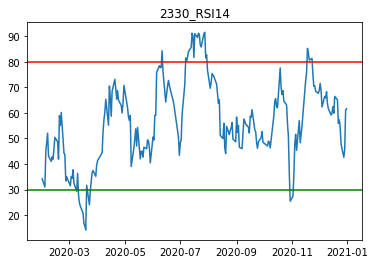

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
stock = pd.read_csv('2330.csv')
stock.index = pd.DatetimeIndex(stock['Date'])
Close = stock.Close
close2020 = Close['2020']
RSI14 = RSI(close2020, 14)
plt.plot(RSI14)
plt.title("2330_RSI14")
plt.axhline(80, color='red')
plt.axhline(30, color='green')

###  建立RSI策略:
策略： RSI14 < 30 買進，RSI14 > 80 賣出

In [119]:
# 訊號標籤
sig = []

# 庫存標籤，只會是0或1，表示每次交易都是買進或賣出所有部位
stock = 0

# 偵測RSI14訊號
for i in range(len(RSI14)):
    if RSI14[i] > 80 and stock == 1:
        stock -= 1
        sig.append(-1)
    elif RSI14[i] < 30 and stock == 0:
        stock += 1
        sig.append(1)
    else:
        sig.append(0)
# 將訊號整理成dataframe
rsi_sig = pd.Series(index = RSI14.index, data = sig)

###  建立函數

In [127]:
def RSI_sig(RSI, up = 80, lo = 20):
    import pandas as pd
    sig = []
    num = 0
    for i in range(len(RSI)):
        if RSI[i]>up and num == 1:
            num -= 1 
            sig.append(-1)
        elif RSI[i]<lo and num == 0:
            num += 1
            sig.append(1)
        else:
            sig.append(0)
    rsi_sig = pd.Series(index = RSI.index, data = sig)
    return rsi_sig

### 繪製出RSI曲線與買進賣出訊號

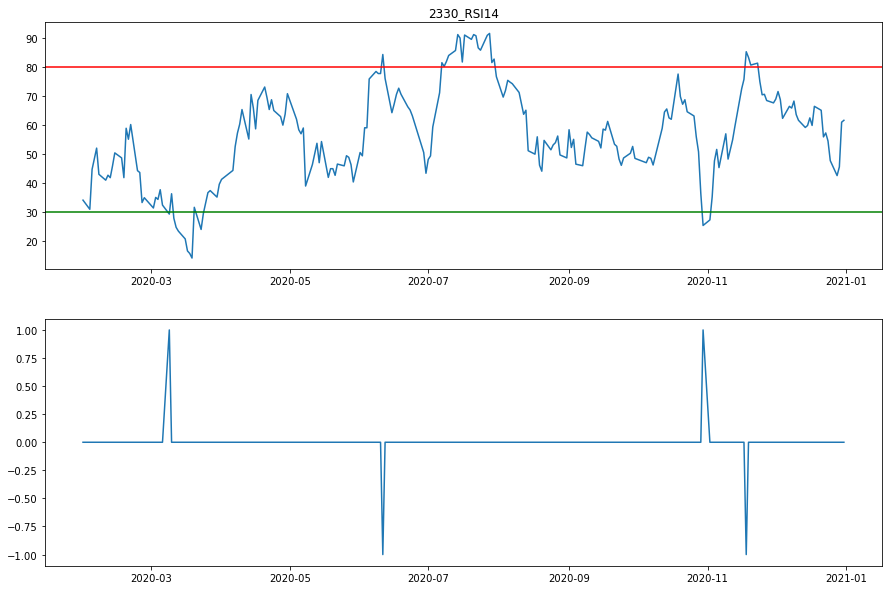

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(RSI14)
plt.axhline(80, color = 'r')
plt.axhline(30, color = 'g')
plt.title('2330_RSI14')

plt.subplot(212)
plt.plot(rsi_sig)
plt.show()

###  計算報酬率
https://ithelp.ithome.com.tw/articles/10239774
>只能在訊號出現後的隔天交易，接下來就可以用這些買賣點，搭配開盤價的資料，計算報酬率。

In [121]:
stock = pd.read_csv('2330.csv')
stock.index = pd.DatetimeIndex(stock['Date'])
Open = stock.Open
open2020 = Open['2020']

rets = []
num = 0
buy = 0
sell = 0

for i in range(len(rsi_sig)):
    if rsi_sig[i] == 1:
        buy = open2020[rsi_sig.index[i+1]]
        num += 1
    elif rsi_sig[i] == -1:
        # 隔日開盤賣出
        sell = open2020[rsi_sig.index[i+1]]
        num -= 1
        rets.append((sell-buy)/buy)
        # 清除上次買賣的價格
        buy = 0
        sell = 0
# 總報酬率
total_ret = 1
for ret in rets:
    total_ret *= 1 + ret
print("總報酬率為: " + str(round((total_ret - 1)*100,2)) + '%')


總報酬率為: 19.64%


###  建立回測函數
需要包含買賣訊號與開盤價資料

In [123]:
def RSI_backtest(RSI_Trading_Sig, Open_Price):
    # 每次買賣的報酬率
    rets = []
    # 是否仍有庫存
    stock = 0
    # 當次交易買入價格
    buy_price = 0
    # 當次交易賣出價格
    sell_price = 0
    # 每次買賣的報酬率
    for i in range(len(RSI_Trading_Sig)-1):
        if RSI_Trading_Sig[i] == 1:
            # 隔日開盤買入
            buy_price = Open_Price[RSI_Trading_Sig.index[i+1]]
            stock += 1
        elif RSI_Trading_Sig[i] == -1:
            # 隔日開盤賣出
            sell_price = Open_Price[RSI_Trading_Sig.index[i+1]]
            stock -= 1
            rets.append((sell_price-buy_price)/buy_price)
            buy_price = 0
            sell_price = 0
    # 如果最後手上有庫存，就用回測區間最後一天的開盤價賣掉
    if stock == 1 and buy_price != 0 and sell_price == 0:
        sell_price = Open_Price[-1]
        rets.append((sell_price-buy_price)/buy_price)
    # 總報酬率
    total_ret = 1
    for ret in rets:
        total_ret *= 1 + ret
    return total_ret

總報酬率：32.48%
最佳化參數：RSI計算天數: 6 ,Upper bond: 76 ,Lower bond: 10


Text(0.5, 0.98, '2330_2021')

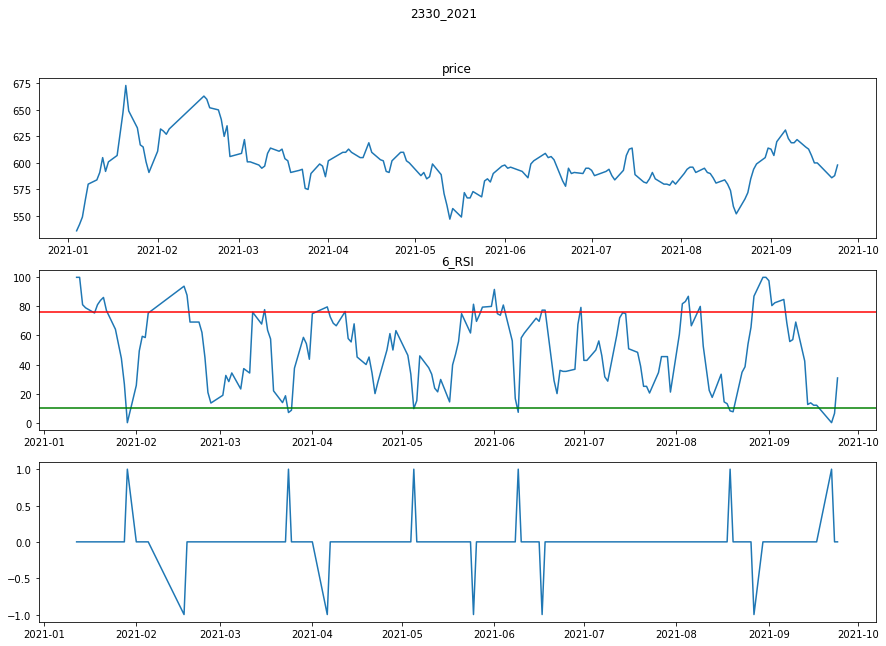

In [142]:
import pandas as pd
stock = pd.read_csv('2330.csv')
stock.index = pd.DatetimeIndex(stock['Date'])
open2020 = stock.Open['2021']
close2020 = stock.Close['2021']

max_total_ret, max_period, max_upper, max_lower = 0, 0, 0, 0
for period in range(6,25):
    for upper in range(70,91):
        for lower in range(10,31):
            ret = RSI_backtest(RSI_sig(RSI(close2020, period), upper, lower), open2020)
            if ret > max_total_ret:
                max_total_ret, max_period, max_upper, max_lower = ret, period, upper, lower

print('總報酬率：' + str(round(100*(max_total_ret-1),2)) + '%')
print('最佳化參數：' + 'RSI計算天數: ' + str(max_period) + ' ,Upper bond: ' + str(max_upper) + ' ,Lower bond: ' + str(max_lower))

import matplotlib.pyplot as plt

y2 = RSI(close2020, max_period)
y3 = RSI_sig(y2, max_upper, max_lower)

plt.figure(figsize = (15,10))
plt.subplot(311)
plt.plot(close2020)
plt.title("price")
plt.subplot(312)
plt.plot(y2)
plt.axhline(max_upper, color = 'r')
plt.axhline(max_lower, color = 'g')
plt.title(str(max_period) + "_RSI")

plt.subplot(313)
plt.plot(y3)

plt.suptitle("2330_2021")

In [140]:
print(y3)

Date
2020-02-12    0
2020-02-13    0
2020-02-14    0
2020-02-17    0
2020-02-18    0
             ..
2020-12-25    0
2020-12-28    0
2020-12-29    0
2020-12-30    0
2020-12-31    0
Length: 223, dtype: int64


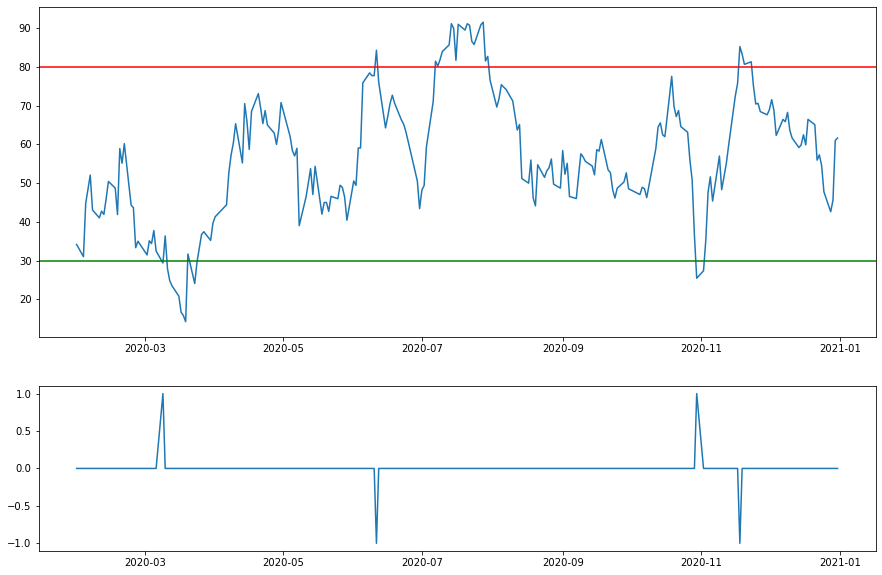

In [72]:
import numpy as np
from matplotlib import gridspec
import pandas as pd

fig = plt.figure(figsize=(15,10))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# line0 = ax0.plot(x, y, color='r')
ax0.plot(RSI14)
ax0.axhline(y=80, color='red')
ax0.axhline(y=30, color='green')

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rsi_sig = pd.Series(index = rsi_sig.index, data = list(rsi_sig.values))
ax1.plot(rsi_sig)

In [1]:
# 安裝mplfinance
!pip install --upgrade mplfinance

買進：手續費率 = 0.1425% = 0.001425  
賣出：手續費率 + 交易稅率 = 0.1425% + 0.3% = 0.4425% = 0.004425  
* 買入成交價 * 1.001425
* 賣出成交價 * (1 - 0.004425) = * 0.995575

支出： 500000 元
收入： 705137 元
淨收益： 205137 元
投資報酬率： 41.03 %


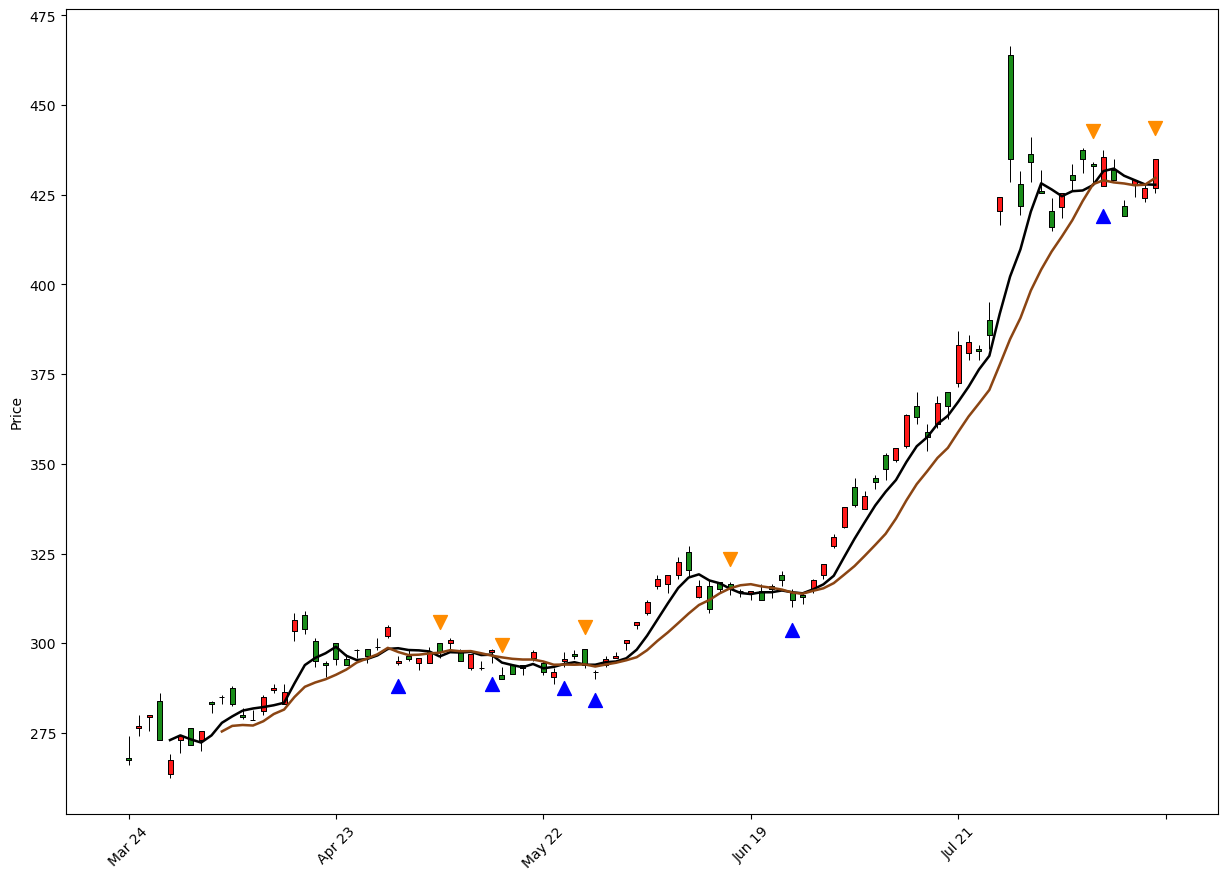

初始金額: 500000 元


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,5/4,+1692,295.0,295.4,-499817,-499817,183
2,5/8,-1692,297.5,296,+501143,1326,501326
3,5/15,+1680,298.0,298.4,-501312,-499986,14
4,5/18,-1680,290.0,289,+485044,-14942,485058
5,5/26,+1639,295.5,295.9,-484980,-499922,78
6,5/28,-1639,294.0,293,+479734,-20188,479812
7,5/29,+1640,292.0,292.4,-479536,-499724,276
8,6/17,-1640,315.0,314,+514314,14590,514590
9,6/29,+1647,312.0,312.4,-514523,-499933,67


In [38]:
#畫點 & 計算！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime
import math
stocks = pd.read_csv('stocksTsmc_2020.csv')
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:150]
colorSet = mpf.make_marketcolors(up = 'r', down = 'g')
styleSet = mpf.make_mpf_style(marketcolors = colorSet)
kwargs = dict(type = 'candle', figscale = 2, style = styleSet)
stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]
def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################
#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

#初始金額
initial = 500000
money = initial

#持有股票數量(股)
stock = 0

#每次購入張數
unit = 1

#目前獲利
gain = 0

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額']]

#暫時交易資訊
temp_detail = []

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        price = round(stocks_close[i] * 1.001425, 1)                                   #計算含稅的股價
        num = math.floor(money/price)                                                  #計算能購買的股數(含稅),無條件捨去小數點
        buy = round(num*price)                                                         #計算實際花費
        money = money-buy                                                              # 更新 money
        #淨收益計算(含稅)
        gain -= buy
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        
        #交易資訊(日期)
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('+' + str(num))                                             #買賣 num股
        stock += num                                                                   #更新持有股數 +num股
        temp_detail.append(stocks_close[i])                                            #購買日買入價格: "收盤價"
        temp_detail.append(price)                                                      #抽稅之後的價格(含稅)
        temp_detail.append('-' + str(buy))                                             #實際花費 buy元
        temp_detail.append(gain)                                                       #目前獲利
        temp_detail.append(money)                                                      #剩餘金額
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i] and stock > 0):
        #出現賣點則全數賣出
        sell = round(stocks_close[i] * 0.995575 * stock)                               #計算實際收入
        money = money + sell                                                           # 更新 money
        
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += sell
        
        #交易資訊(日期)
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('-' + str(stock))                                           #股票全部賣出
        temp_detail.append(stocks_close[i])                                            #賣出日賣出價格: "收盤價"
        temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格(含稅)
        temp_detail.append('+' + str(sell))                                            #實際收入 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        temp_detail.append(money)                                                      #剩餘金額
        stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊            

#支出、收入、淨收益、投資報酬率
cost = initial
income = money     
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")        
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]
mpf.plot(stocks, **kwargs, addplot = addplots)
print("初始金額:", initial, '元')
detail = pd.DataFrame(detail)
detail

In [26]:
import math
#初始設定金額
money = 500000
price = 295.4
num = math.floor(money/price) # 無條件捨去
print('能購買股數:',num,'股')
print('交易價格:',round(num*price),'元')
money = money-round(num*price)
print('剩餘金額:',money,'元')

能購買股數: 1692 股
交易價格: 499817 元
剩餘金額: 183 元


sell | 2019-08-27 00:00:00 80.15
buy  | 2019-10-09 00:00:00 86.15
buy  | 2019-12-13 00:00:00 96.75
sell | 2020-02-19 00:00:00 91.15
sell | 2020-02-25 00:00:00 89.5
buy  | 2020-06-03 00:00:00 86.15
buy  | 2020-07-03 00:00:00 92.1
buy  | 2020-09-17 00:00:00 106.05
buy  | 2020-10-08 00:00:00 105.45
buy  | 2020-11-09 00:00:00 107.75
buy  | 2020-12-07 00:00:00 118.5
buy  | 2021-01-04 00:00:00 122.2
buy  | 2021-02-19 00:00:00 139.55


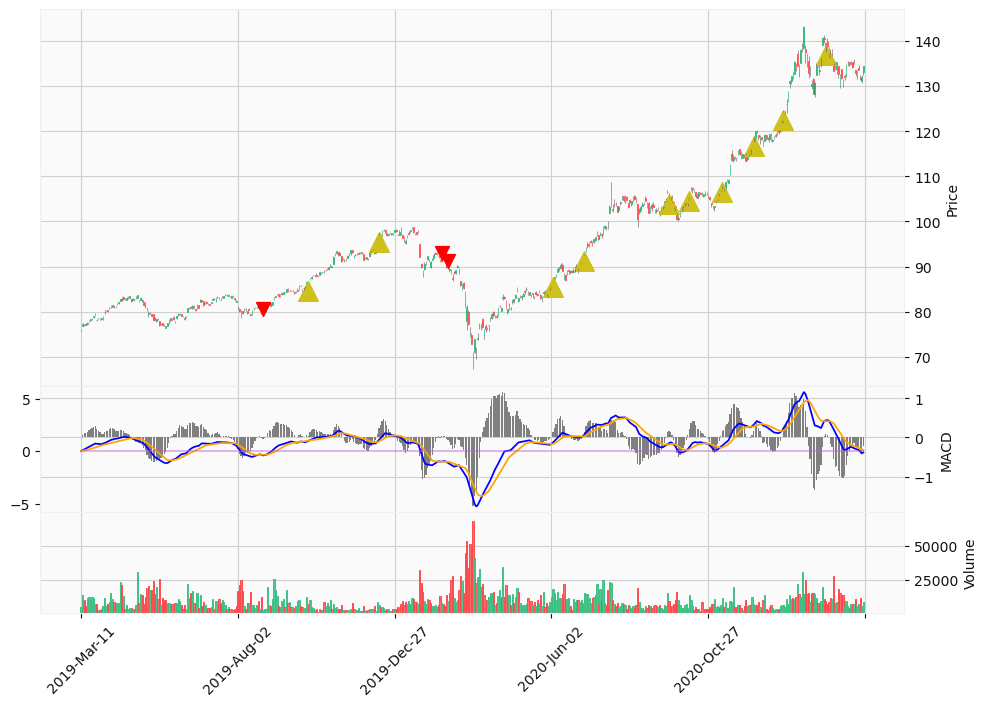

In [6]:
import pandas as pd
import numpy as np

file = "0050.csv"
ticker = pd.read_csv(file)
ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
ticker = ticker.set_index('Date')
ticker.index = pd.to_datetime(ticker.index)
ticker = ticker.sort_index()
ticker = ticker.tail(500)
#print(ticker)

# Define constants
MACD_N = 9
MACD_EMA_SLOW = 26
MACD_EMA_QUICK = 12
middle_line = 0
tmp = pd.DataFrame(index=ticker.index)
data = ticker.copy(deep=True)
tmp['ema12'] = data['Close'].ewm(span=MACD_EMA_QUICK, adjust=False).mean() # exponential moving average
tmp['ema26'] = data['Close'].ewm(span=MACD_EMA_SLOW, adjust=False).mean() # exponential moving average
#print(tmp.head(10))

data['macd_DIF']  = tmp['ema12'] - tmp['ema26']                             # qucik MACD
data['macd_DEM'] = data['macd_DIF'].ewm(span = MACD_N, adjust=False).mean()# slow MACD
data['macd_BAR'] = data['macd_DIF'] - data['macd_DEM']                     # MACD bar
#print(data.head(10))

strategy_1 = pd.DataFrame(index=ticker.index)
strategy_1['buy'] = np.zeros(ticker.shape[0])
strategy_1['sell'] = np.zeros(ticker.shape[0])


# skip first RSI_n days
for i in range(MACD_EMA_SLOW, data.shape[0]):

    if(data['macd_DIF'][i] > 0 and data['macd_DEM'][i] > 0):
        # fast MACD  upcross slow MACD
        if((data['macd_DIF'][i-1] < data['macd_DEM'][i-1]) and
           (data['macd_DIF'][i]   > data['macd_DEM'][i]) and
           (data['macd_DIF'][i-1] < data['macd_DIF'][i])):
            strategy_1.loc[(data.index[i+1], 'buy')] = 1
            print('buy  |', data.index[i+1], data['Open'][i+1])   # modified, buy at the opening price the next day
            
    if(data['macd_DIF'][i] < 0 and data['macd_DEM'][i] < 0):
        # fast MACD  downcross slow MACD
        if((data['macd_DIF'][i-1] > data['macd_DEM'][i-1]) and
           (data['macd_DIF'][i]   < data['macd_DEM'][i]) and
           (data['macd_DIF'][i-1] > data['macd_DIF'][i])):
            
            strategy_1.loc[(data.index[i+1], 'sell')] = 1
            print('sell |', data.index[i+1], data['Open'][i+1])  # modified, sell at the opening price the next day

plots = []
# the position in graph
buy, sell = [], []
for index, row in data.iterrows():     # iterrows() 會傳回索引該行以及該行的整個資料   
    buy.append(row['Close']*0.985 if strategy_1.loc[index]['buy'] else np.nan)
    sell.append(row['Close']*1.01 if strategy_1.loc[index]['sell'] else np.nan)

plots = [
          mpf.make_addplot(data['macd_BAR'], type = 'bar', panel = 1, color = 'grey', ylabel = 'MACD'),
          mpf.make_addplot(data['macd_DIF'], panel = 1, color = 'blue'),
          mpf.make_addplot(data['macd_DEM'], panel = 1, color = 'orange'),
          mpf.make_addplot(np.full((len(data)), middle_line), panel = 1, color='#bf5ce0', alpha=0.5),
       ]
if not np.count_nonzero(np.isnan(sell)) == len(sell):
    plots.append(mpf.make_addplot(sell , type = 'scatter', color = 'red', marker = 'v', markersize = 100))
if not np.count_nonzero(np.isnan(buy)) == len(buy):
    plots.append(mpf.make_addplot(buy , type = 'scatter', color = '#cfc01d', marker = '^', markersize = 200))
    
mpf.plot(data,
         type='candle',   # candlestick chart of stock price
         volume=True,     # plots trading volume as well
         volume_panel=2,
         figscale=1.5,
         addplot = plots,
         style='yahoo', 
         panel_ratios = (3, 1, 0.8)
)  